# Introducing Advanced Deep Learning with Keras

This notebook introduces the three architectures of artificial neural networks: __MLPs__, __CNNs__, and __RNNs__. They are the core building blocks of most advanced deep learning topics such as Autoencoders and GANs. We'll implement the models using the Keras library, and introduce important deep learning concepts including optimization, regularization, and loss functions.


## Keras Library
TensorFlow, a popular open source deep learning library,uses Keras as a high-level API to its library. We'll start by introducing how to use the __Keras Sequential API__.

## MNIST Dataset

MNIST is a collection of handwritten digits ranging from the number 0 to 9. It has a training set of 60,000 images, and 10,000 test images that are classified into corresponding categories or labels. In some literature, the term __target__ or __ground truth__ is also used to refer to the __label__.

In [0]:
# accessing the MNIST Dataset

%tensorflow_version 2.x

import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import mnist

# load dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

TensorFlow is already loaded. Please restart the runtime to change versions.


In [0]:
# count the number of unique test labels
unique, counts = np.unique(y_train, return_counts = True)
print("Train labels: ", dict(zip(unique, counts)))

# count the number of unique test labels
unique, counts = np.unique(y_test, return_counts = True)
print("Test labels: ", dict(zip(unique, counts)))

Train labels:  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}
Test labels:  {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


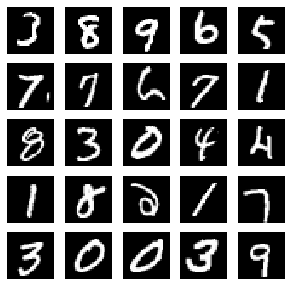

In [0]:
# sample 25 mnist digits from train dataset
indexes = np.random.randint(0, X_train.shape[0], size = 25)
images = X_train[indexes]
labels = y_train[indexes]

# plot the 25 mnist digits
plt.figure(figsize = (5, 5))
for i in range(len(indexes)):
  plt.subplot(5, 5, i + 1)
  image = images[i]
  plt.imshow(image, cmap = 'gray')
  plt.axis('off')

plt.show();

## MNIST digits classifier model
The MLP model for MNIST classification. The fully connected model in the figure below shows how the output of the perceptron is computed from inputs as a function of weights, $w_i$ and bias, $b_n$ for the $n^{th$}$ unit.

## Multilayer Perceptrons (MLPs)

__MLPs__ are a fully connected network, often referred to as either deep feedforward networks or simply feed forward neural networks. Let's implement it in Keras


In [0]:
%tensorflow_version 2.x

# import libraries
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.datasets import mnist

# load mnist dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# compute the number of labels
num_labels = len(np.unique(y_train))

# convert to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# image dimensions
image_size = X_train.shape[1]
input_size = image_size * image_size

# resize and normalize
X_train = np.reshape(X_train, [-1, input_size])
X_train = X_train.astype('float32') / 255
X_test = np.reshape(X_test, [-1, input_size])
X_test = X_test.astype('float32') / 255

# network parameters
batch_size = 128
hidden_units = 256
dropout = 0.45

# model is 3-Layer MLP with ReLU and dropout after each layer
model = Sequential()
model.add(Dense(hidden_units, input_dim = input_size))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(num_labels))

# this is the output for one-hot vector
model.add(Activation('softmax'))
model.summary()
plot_model(model, to_file = 'mlp-mnist.png', show_shapes = True)

# loss function for one-hot vector
# use adam optimizer
# accuracy is a good metric for classification tasks
model.compile(loss = 'categorical_crossentropy', 
              optimizer = 'adam',
              metrics = ['accuracy'])

# train the network
model.fit(X_train, y_train, epochs = 20, batch_size = batch_size)

# validate the model on test dataset to determine generalization
loss, acc = model.evaluate(X_test, y_test, batch_size = batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

TensorFlow is already loaded. Please restart the runtime to change versions.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
activation (Activation)      (None, 256)               0         
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_1 (Dropout)          (

## Explanation
The above model is made of three MLP layers. In Keras, an MLP layer is referred to as __Dense__, which stands for the densely connected layer. Both the first and second MLP layers are identical in nature with 256 units each, followed by __relu activation__ and __dropout__. 256 units are chosen since 128, 512 and 1,024 units have lower performance metrics. At 128 units, the network converges quickly, but has a lower test accuracy. The added number units for 512 or 1,024 does not increase the test accuracy significantly.

The number of units is a __hyperparameter__. It controls the __capacity__ of the network. The capacity is a measure of the complexity of the function that the network can approximate. For example, for polynomials, the degree is the hyperparameter. As the degree increases, the capacity of the function also increases. As shown in the following model, the classifier model is implemented using a sequential model API of Keras. This is sufficient if the model requires one input and one output processed by a sequence of layers.

Since a `Dense` layer is a linear operation, a sequence of `Dense` layers can only approximate a linear function. The problem is that the MNIST digit classification is inherently a non-linear process. Inserting a `relu` activation between `Dense` layers will enable MLPs to model non-linear mappings. `relu` or __Rectified Linear Unit (ReLU)__ is a simple non-linear function. It's very much like a filter that allows positive inputs to pass through unchanged while clamping everything else to zero. Mathematically, `relu` is expressed in the following equation:

$$
\text{relu}(x) = \text{max}(0, x)
$$

There are other non-linear functions that can be used such as `elu`, `selu`, `softplus`, `sigmoid`, and `tanh`. However, relu is the most commonly used in the industry and is computationally efficient due to its simplicity. The `sigmoid` and `tanh` are used as activation functions in the output layer

## Regularization
A neural network has the tendency to memorize its training data especially if it contains more than enough capacity. In such a case, the network fails catastrophically when subjected to the test data. To avoid this tendency, the model uses a regularizing layer or function. A common regularizing layer is referred to as a __dropout__.

The idea of dropout: given a dropout rate (above, it is set to `dropout=0.45`), the `Dropout` layer randomly removes that fraction of units from participating in the next layer. For example, if the first layer has 256 units, after `dropout=0.45` is applied, only (1 - 0.45) * 256 units = 140 units from layer 1 participate in layer 2. The `Dropout` layer makes neural networks robust to unforeseen input data because the network is trained to predict correctly, even if some units are missing. Dropout is not used in the output layer and it is only active during training. Moreover, dropout is not present during prediction.

There are regularizers that can be used other than dropouts like `l1` or `l2`. In Keras, the bias, weight and activation output can be regularized per layer. `l1` and `l2` favor smaller parameter values by adding a penalty function. Both `l1` and `l2` enforce the penalty using a fraction of the sum of absolute (`l1`) or square (`l2`) of parameter values. In other words, the penalty function forces the optimizer to find parameter values that are small. Neural networks with small parameter values are more insensitive to the presence of noise from within the input data.

Example of `l2` weight regularizer with `fraction=0.001`:

```python
from tensorflow.keras.regularizers import l2

model.add(Dense(hidden_units,
                kernel_regularizer = l1(0.001),
                input_dim = input_size))
```
No additional layer is added if `l1` or `l2` regularization is used. The regularization is imposed in the `Dense` layer internally. For the proposed model, dropout still has a better performance than `l2`.

## Output Activation and Loss Function

The output layer has 10 units followed by `softmax` activation. The 10 units correspond to the 10 possible labels, classes or categories. The `softmax` activation can be expressed mathematically as shown in the following equation:
$$
\text{softmax}(x_i) = \frac{e^{x_i}}{\sum_{j=0}^{N-1}e^{x_j}}
$$

There are other choices of output activation layer, like `linear`, `sigmoid`, and `tanh`. The linear activation is an identity function. It copies its input to its output. The `sigmoid` function is more specifically known as a __logistic sigmoid__. This will be used if the elements of the prediction tensor should be mapped between 0.0 and 1.0 independently. The summation of all elements of the predicted tensor is not constrained to 1.0 unlike in `softmax`. For example, `sigmoid` is used as the last layer in sentiment prediction (0.0 is bad to 1.0, which is good) or in image generation (0.0 is 0 to 1.0 is 255-pixel values).

The `tanh` function maps its input in the range -1.0 to 1.0. This is important if the output can swing in both positive and negative values. The `tanh` function is more popularly used in the internal layer of recurrent neural networks but has also been used as output layer activation. If `tanh` is used to replace `sigmoid` in the output activation, the data used must be scaled appropriately. For example, instead of scaling each grayscale pixel in the range [0.0  1.0] using:
$$
x = \frac{x}{255},
$$

it is assigned in the range [-1.0, 1.0] by
$$
x = \frac{x - 127.5}{127.5}
$$

The following graph shows the `sigmoid` and `tanh` functions. Mathematically, `sigmoid` can be expressed in equation as follows:
$$
\text{sigmoid}(x) = \sigma(x)=\frac{1}{1+e^{-x}}
$$

How far the predicted tensor is from the one-hot ground truth vector is called __loss__. One type of loss function is `mean_squared_error`__(mse)__, or the average of the squares of the differences between target and prediction. In the current example, we are using `categorical_crossentropy`. It's the negative of the sum of the product of the target and the logarithm of the prediction. There are other loss functions that are available in Keras, such as `mean_absolute_error`, and `binary_crossentropy`. The choice of the loss function is not arbitrary but should be a criterion that the model is learning. For classification by category, `categorical_crossentropy` or `mean_squared_error` is a good choice after the softmax activation layer. The `binary_crossentropy` loss function is normally used after the `sigmoid` activation layer while `mean_squared_error` is an option for `tanh` output.

## Optimization

With optimization, the objective is to minimize the loss function. The idea is that if the loss is reduced to an acceptable level, the model has indirectly learned the function mapping input to output. Performance metrics are used to determine if a model has learned the underlying data distribution. The default metric in Keras is __loss__. During training, validation, and testing, other metrics such as __accuracy__ can also be included. Accuracy is the percent, or fraction, of correct predictions based on ground truth. In deep learning, there are many other performance metrics. However, it depends on the target application of the model.

In Keras, there are several choices for optimizers. The most commonly used optimizers are; __Stochastic Gradient Descent (SGD)__, __Adaptive Moments (Adam)__, and __Root Mean Squared Propagation (RMSprop)__. Each optimizer features tunable parameters like learning rate, momentum, and decay. Adam and RMSprop are variations of SGD with adaptive learning rates. In the proposed classifier network, Adam is used since it has the highest test accuracy.

SGD is considered the most fundamental optimizer. It's a simpler version of the gradient descent in calculus. In __gradient descent (GD)__, tracing the curve of a function downhill finds the minimum value, much like walking downhill in a valley or opposite the gradient until the bottom is reached.

Let's suppose x is the parameter (for example, weight) being tuned to find the minimum value of y (for example, loss function). Starting at an arbitrary point of x = -0.5 with the gradient being.
